In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1325,2020-08-17,United Kingdom,317944.0,318484.0,41422.0,41366.0,-540.0,56.0
1326,2020-08-17,Germany,224761.0,224014.0,9243.0,9232.0,747.0,11.0
1327,2020-08-17,Iran,345002.0,343203.0,19738.0,19639.0,1799.0,99.0
1328,2020-08-17,Turkey,249192.0,249309.0,5974.0,5974.0,-117.0,0.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  5332.575939849624
RMSE =  19630.082774770995


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  294.7398496240601
RMSE =  717.8818331144685


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  34221.23622047244
RMSE =  60596.24841490296
-- World performances for deaths --
MAE =  1584.8188976377953
RMSE =  1949.1495137037728


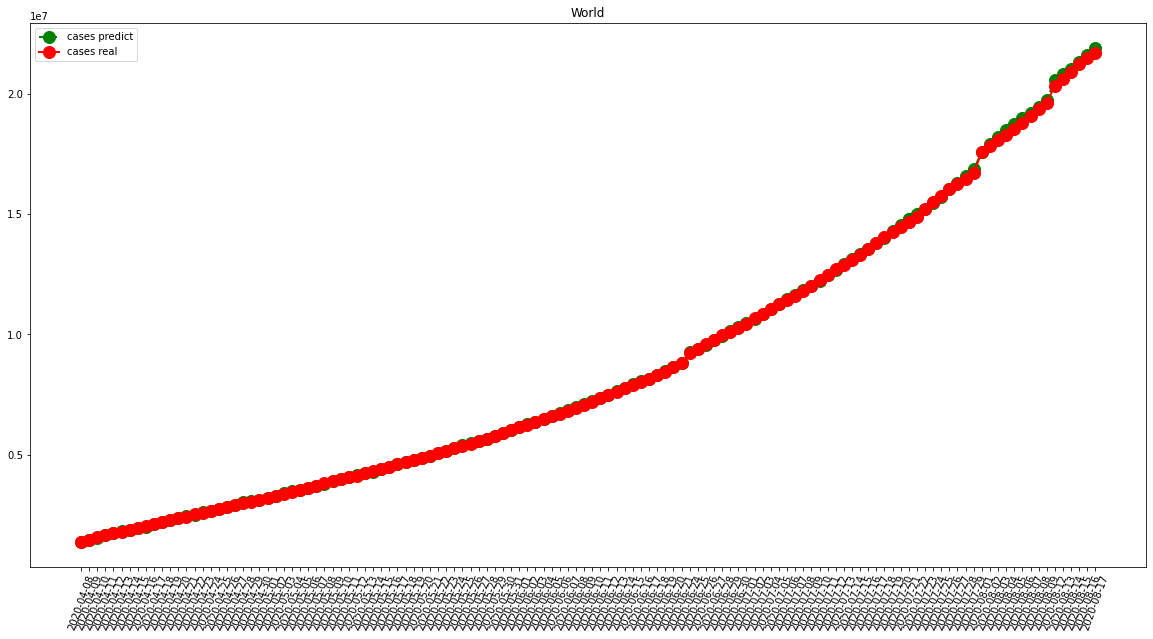

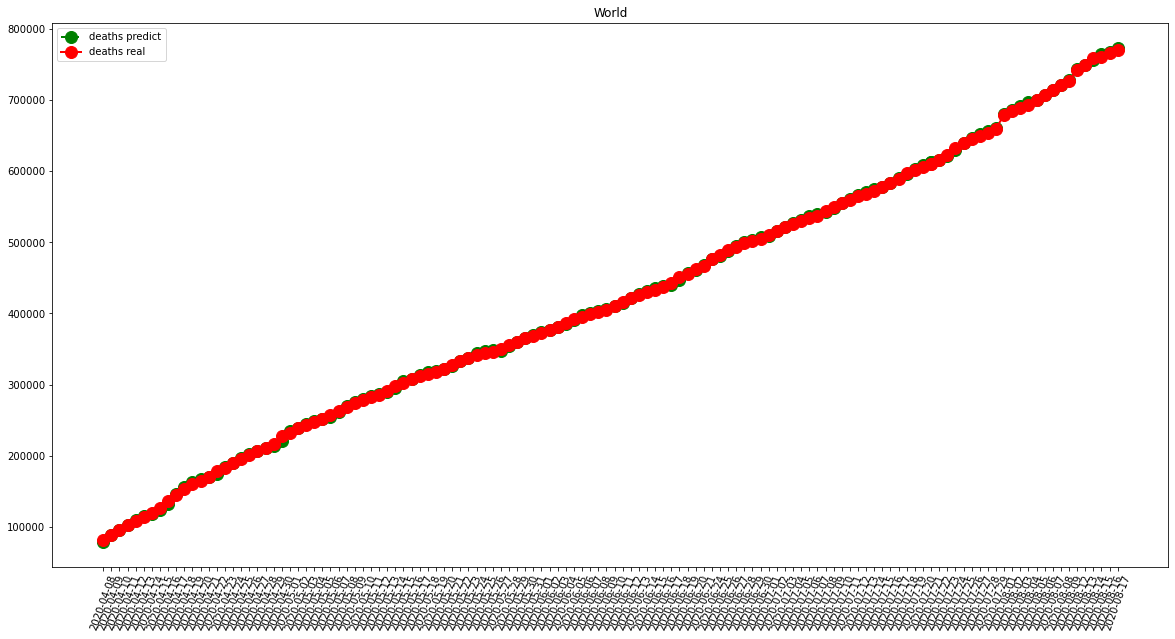

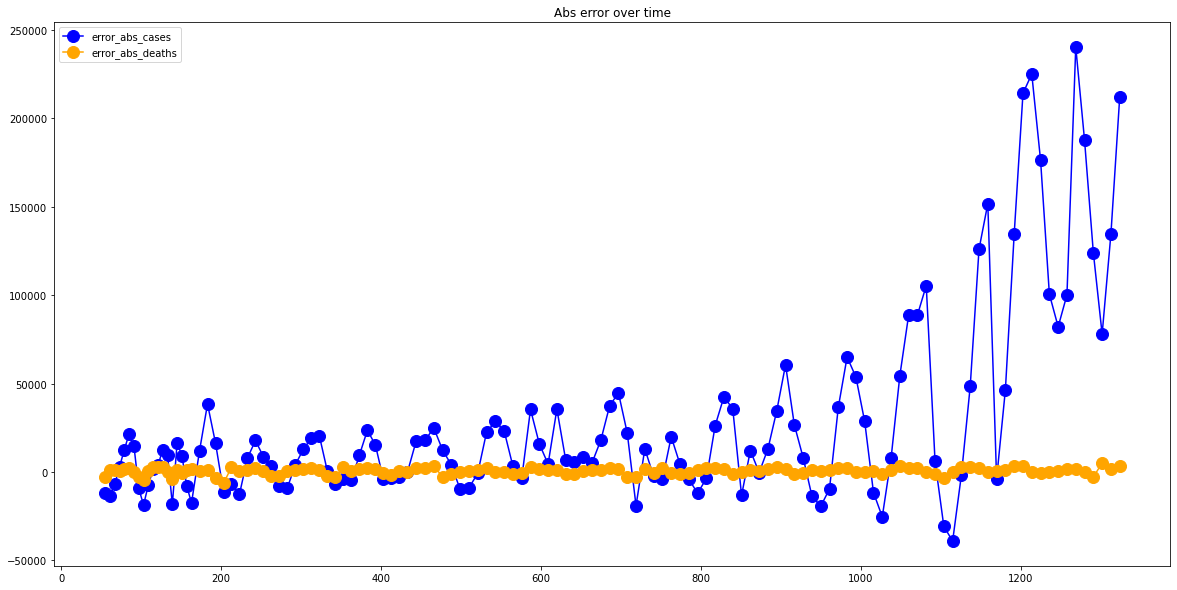

In [7]:
visShow("World")

-- France performances for cases --
MAE =  886.2408759124088
RMSE =  1365.380546403218
-- France performances for deaths --
MAE =  134.27007299270073
RMSE =  286.46604619123354


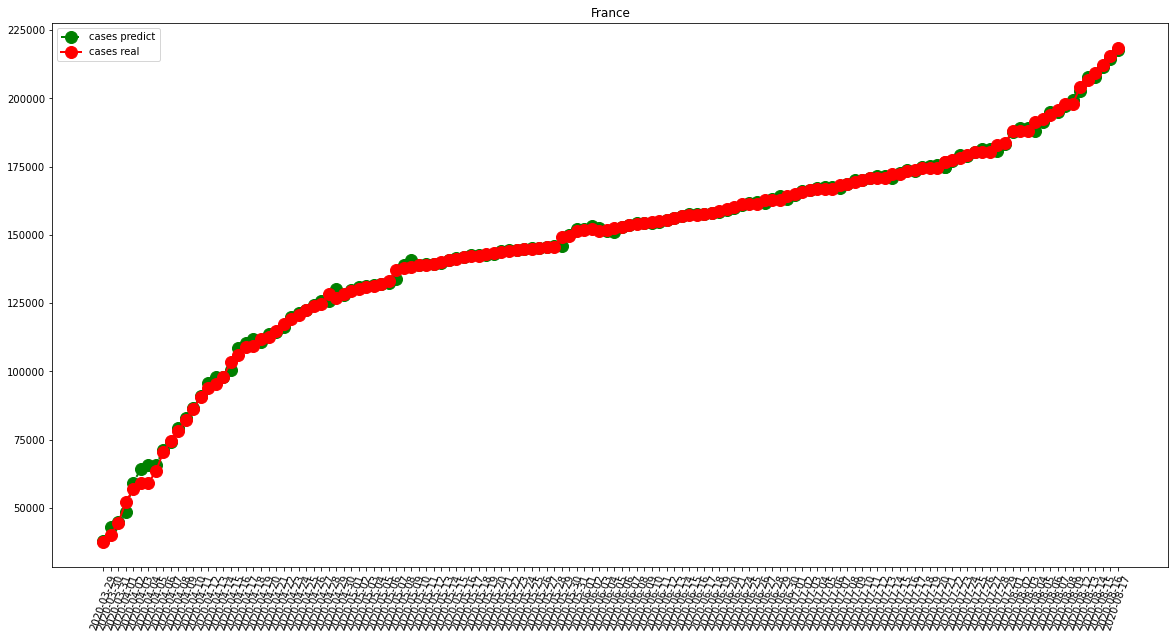

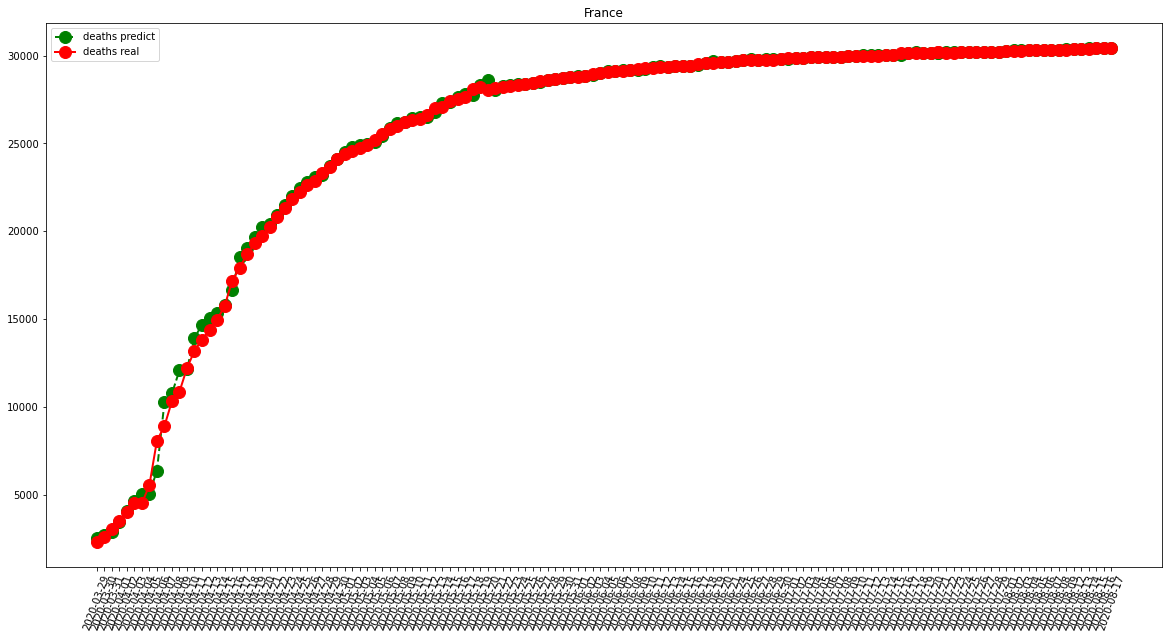

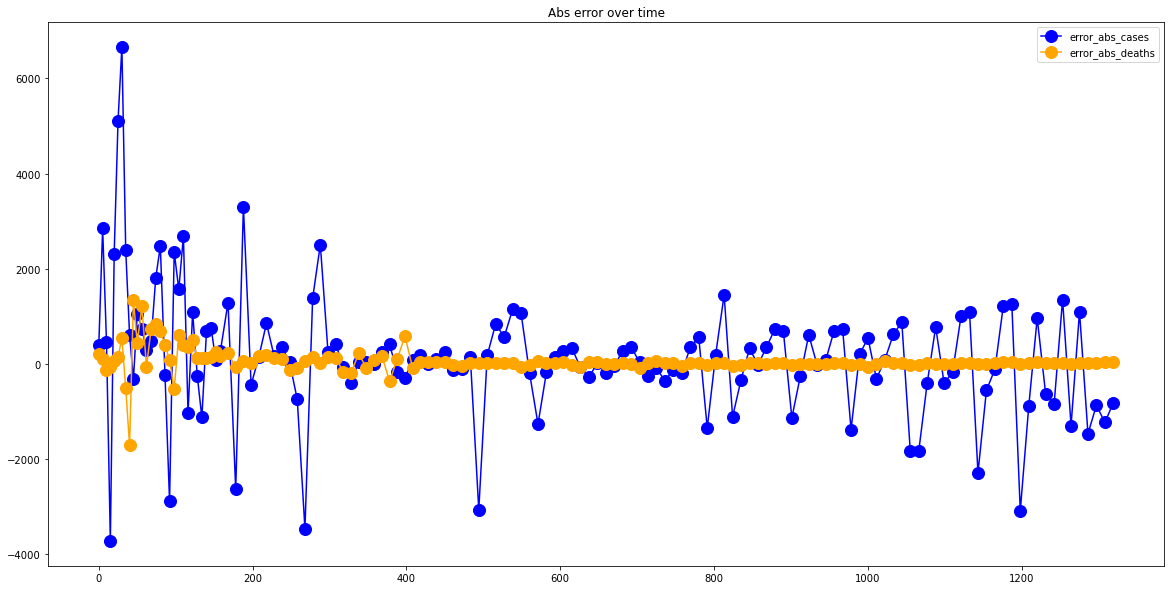

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.2189781021898
RMSE =  469.0415837633909
-- Italy performances for deaths --
MAE =  78.06569343065694
RMSE =  253.19285226474346


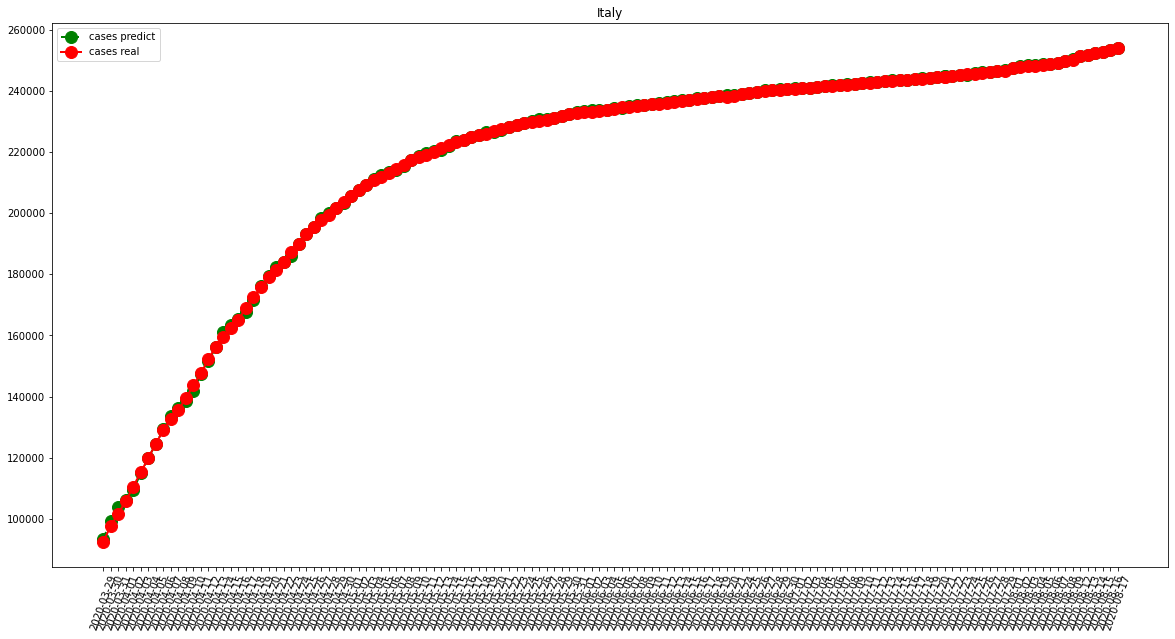

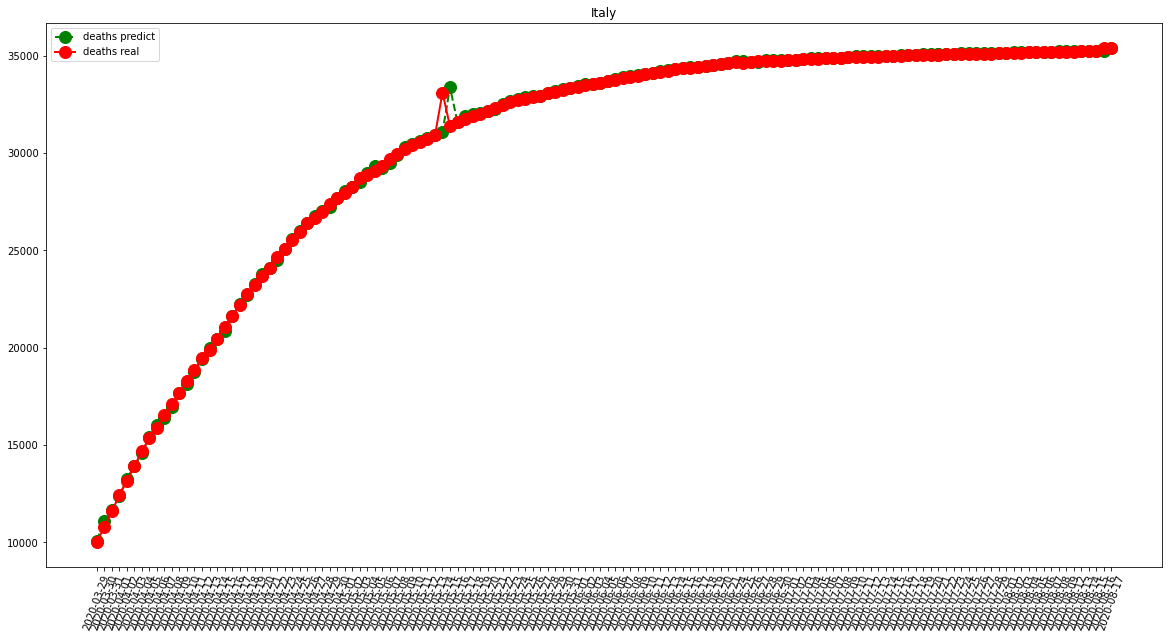

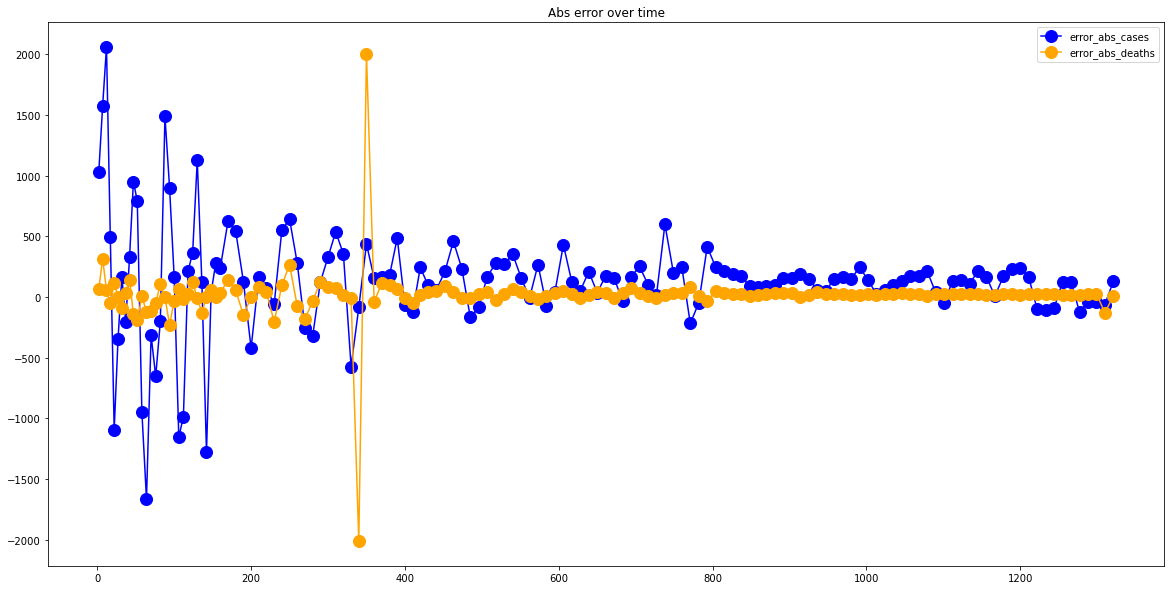

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1308.2627737226278
RMSE =  2412.0268697587007
-- Spain performances for deaths --
MAE =  136.31386861313868
RMSE =  346.8891048950522


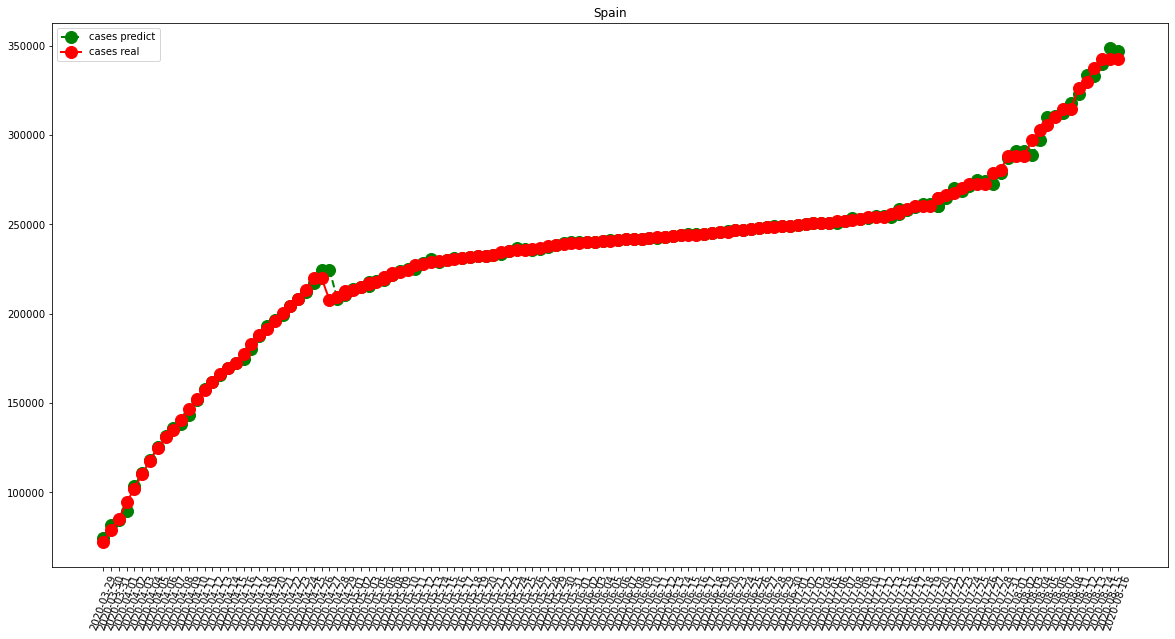

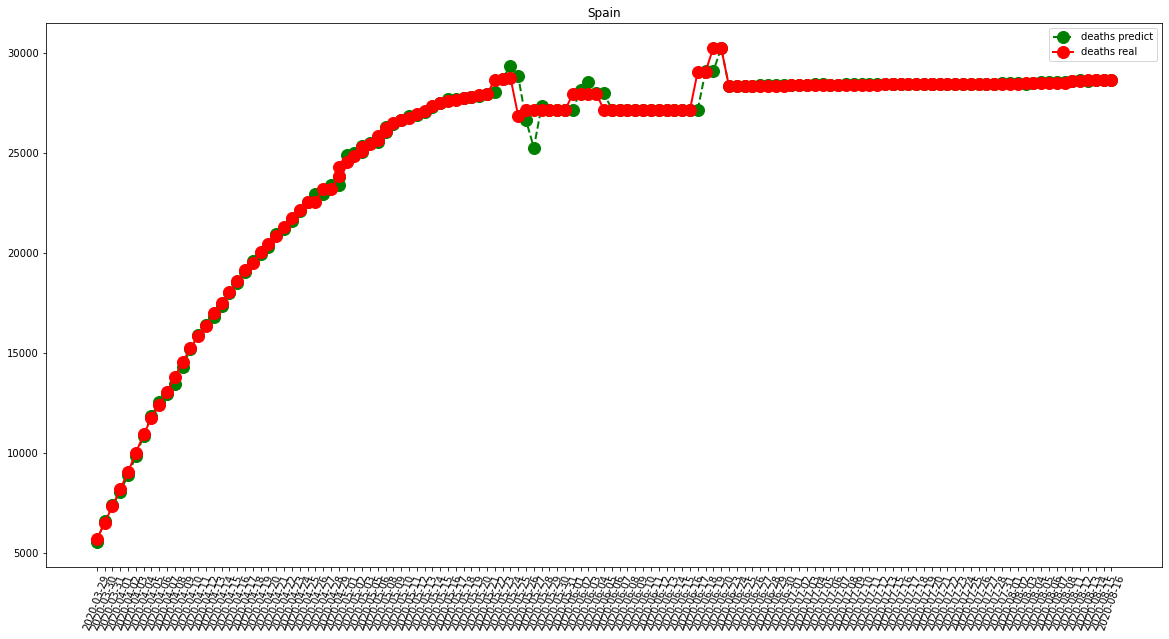

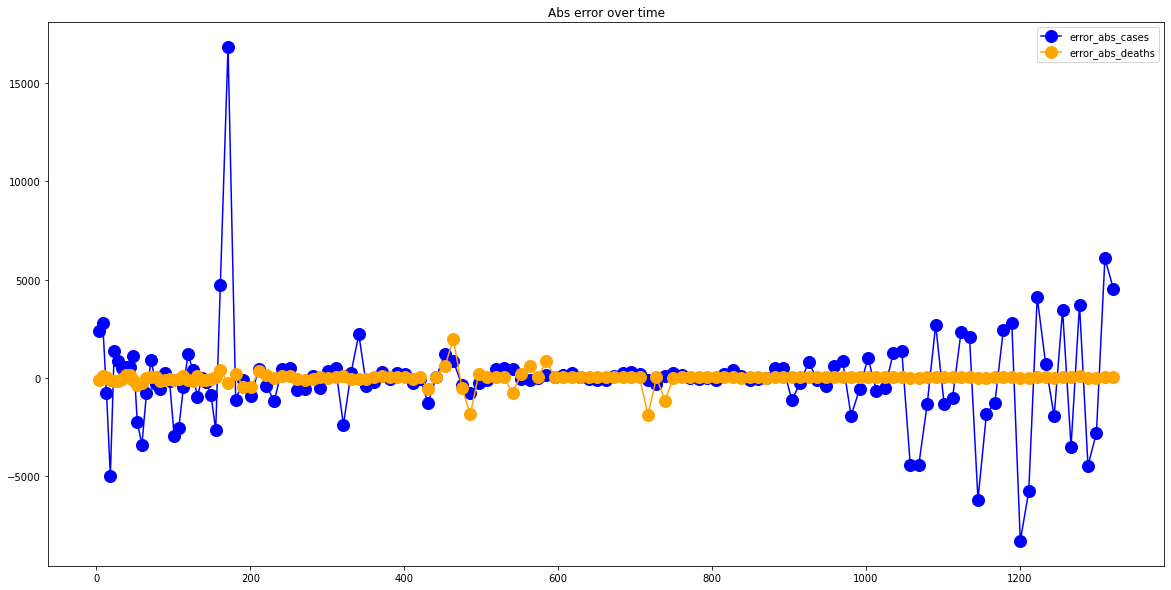

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  8350.817518248175
RMSE =  12557.51289302122
-- United States performances for deaths --
MAE =  494.91970802919707
RMSE =  709.5002353358354


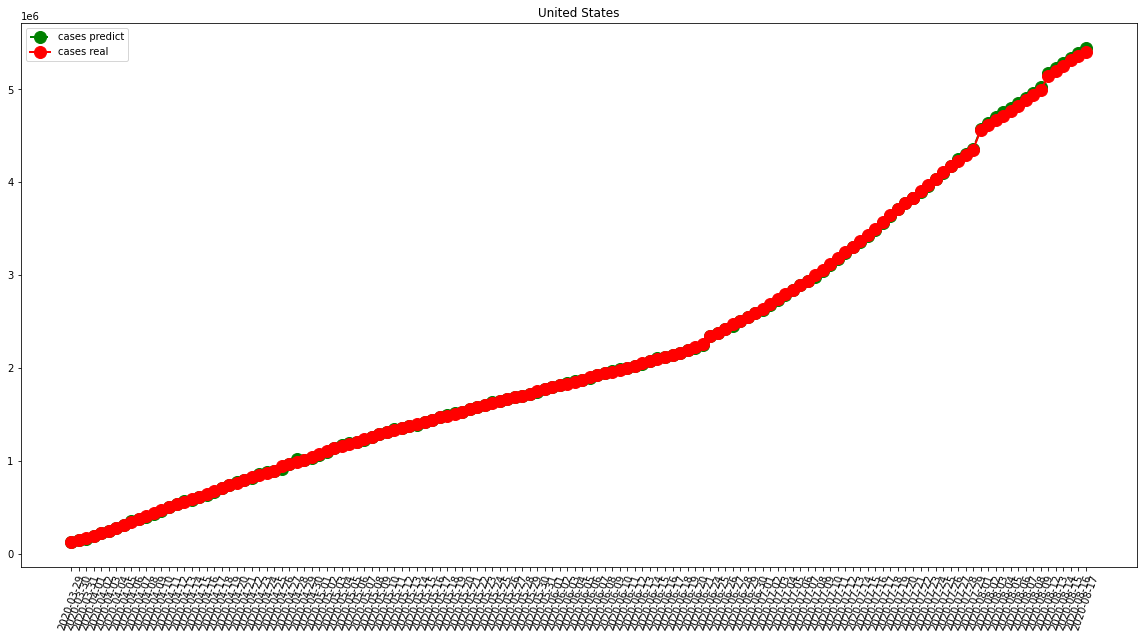

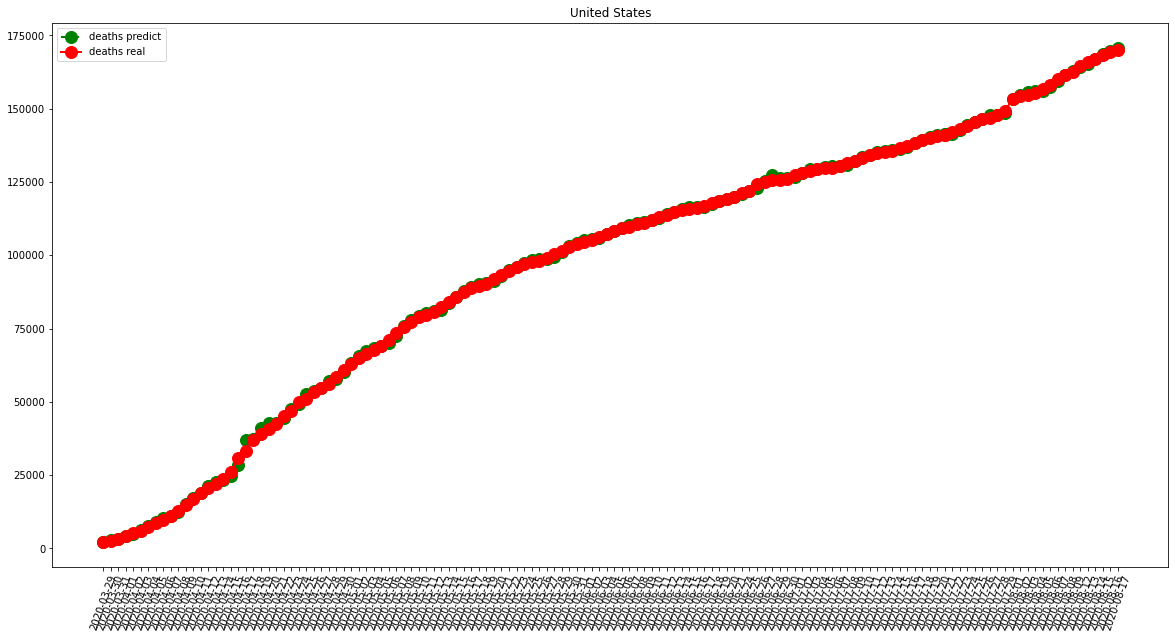

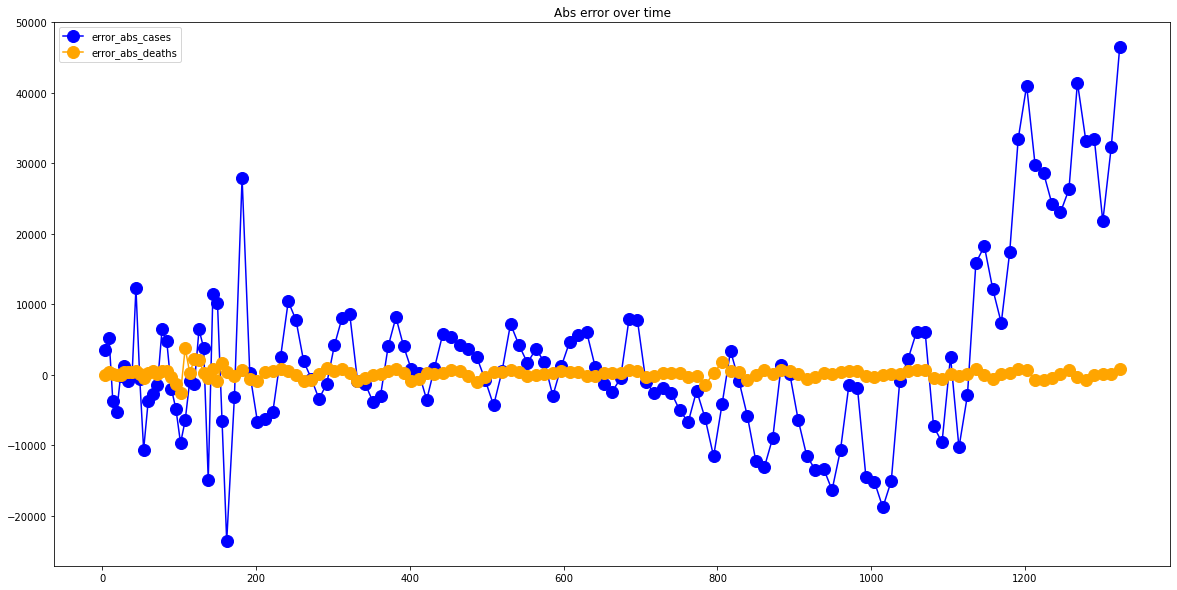

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  72.1094890510949
RMSE =  101.88189097199363
-- China performances for deaths --
MAE =  29.868613138686133
RMSE =  134.14166169188397


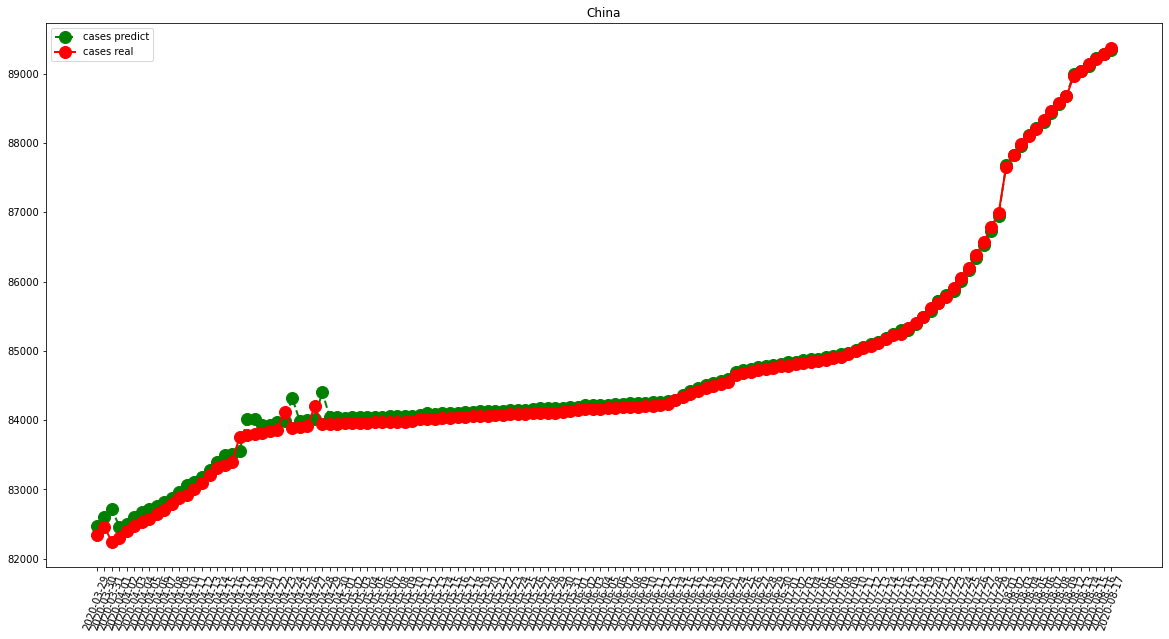

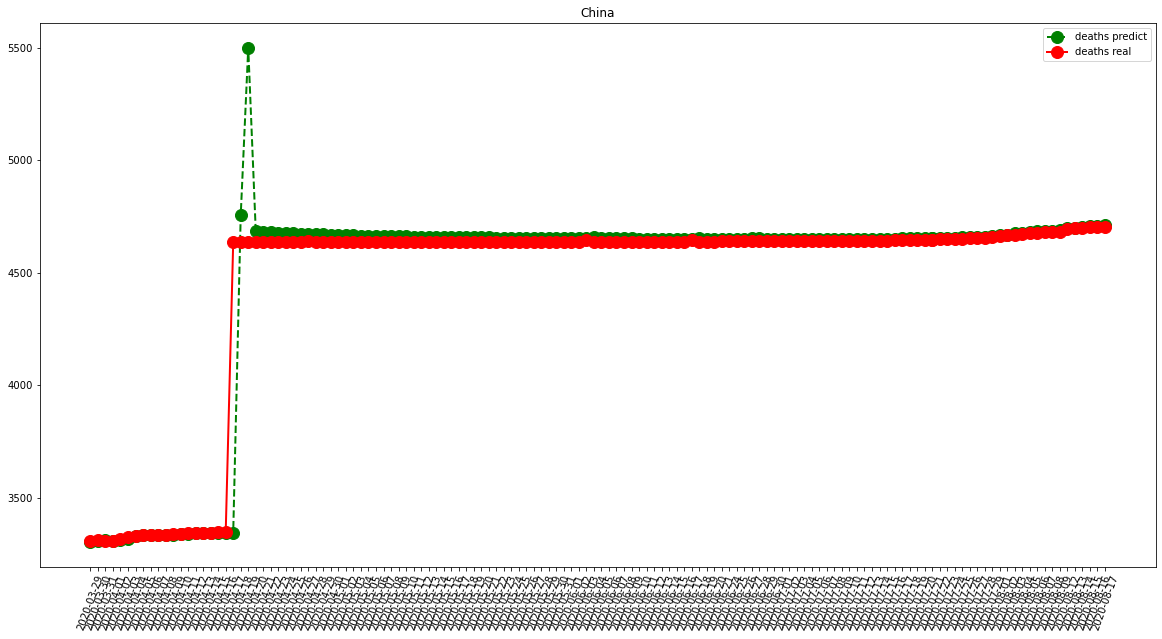

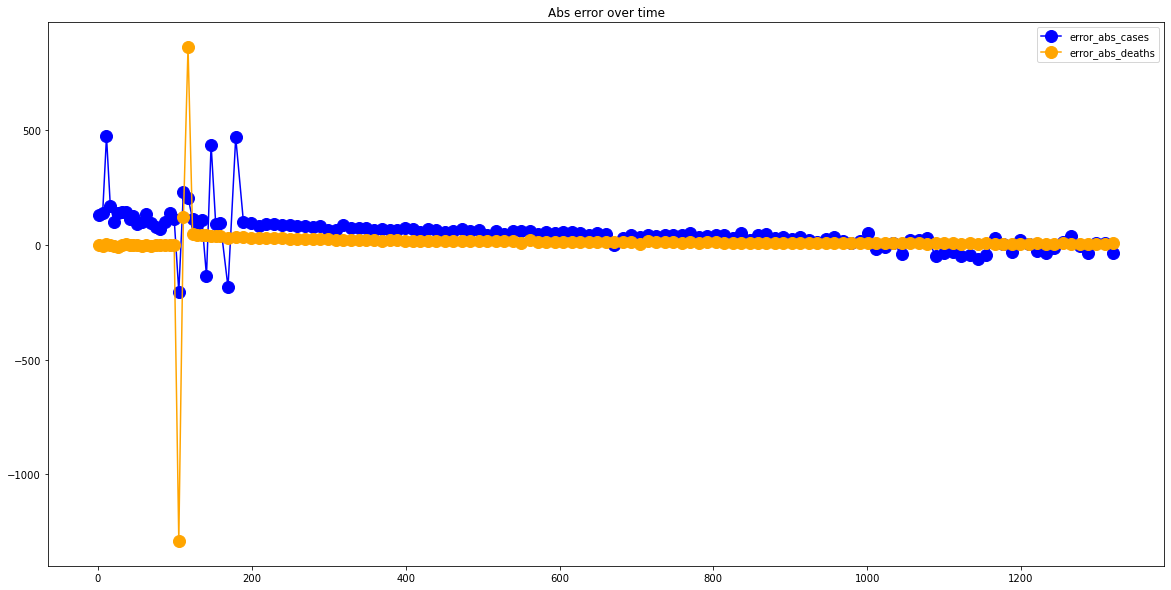

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1180.4495412844037
RMSE =  4004.013194352693
-- United Kingdom performances for deaths --
MAE =  272.1467889908257
RMSE =  817.2876039210039


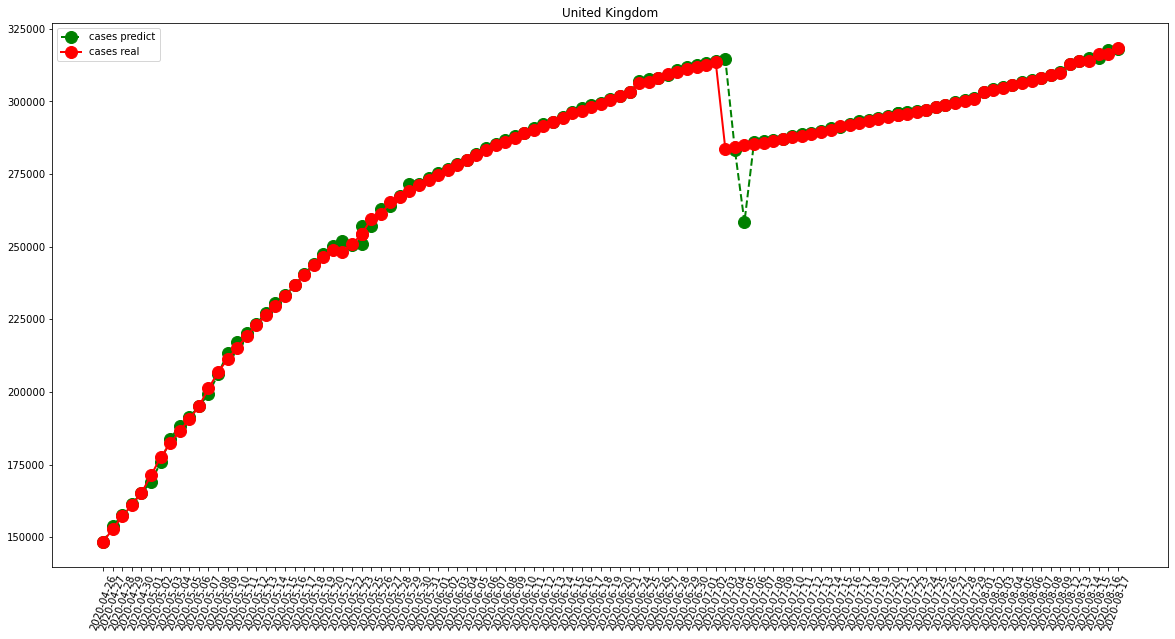

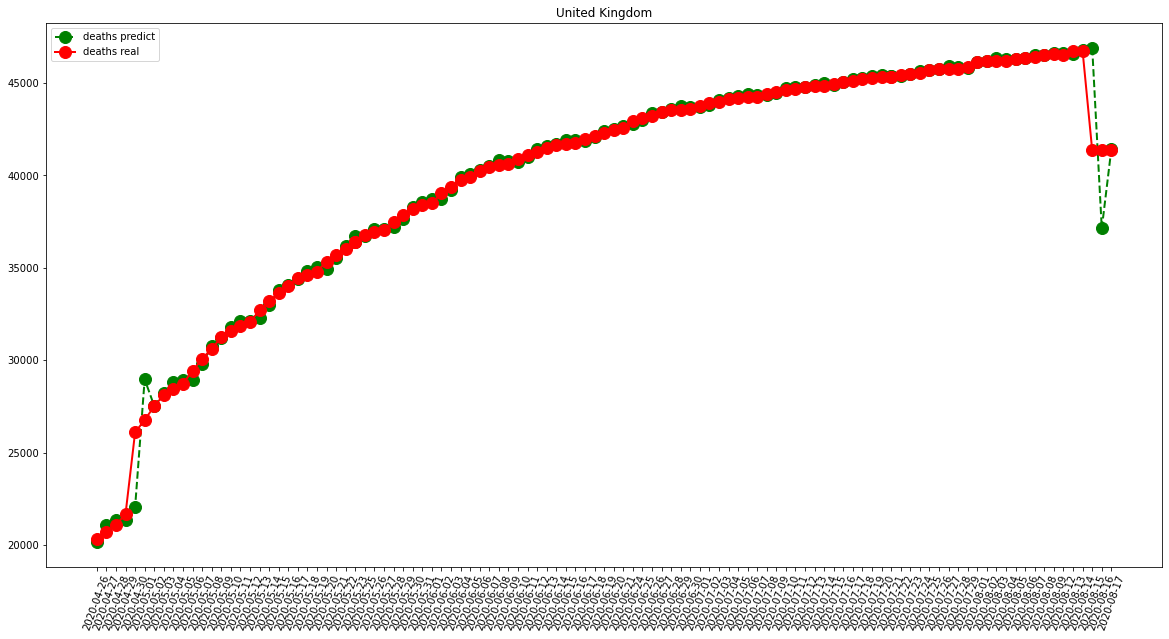

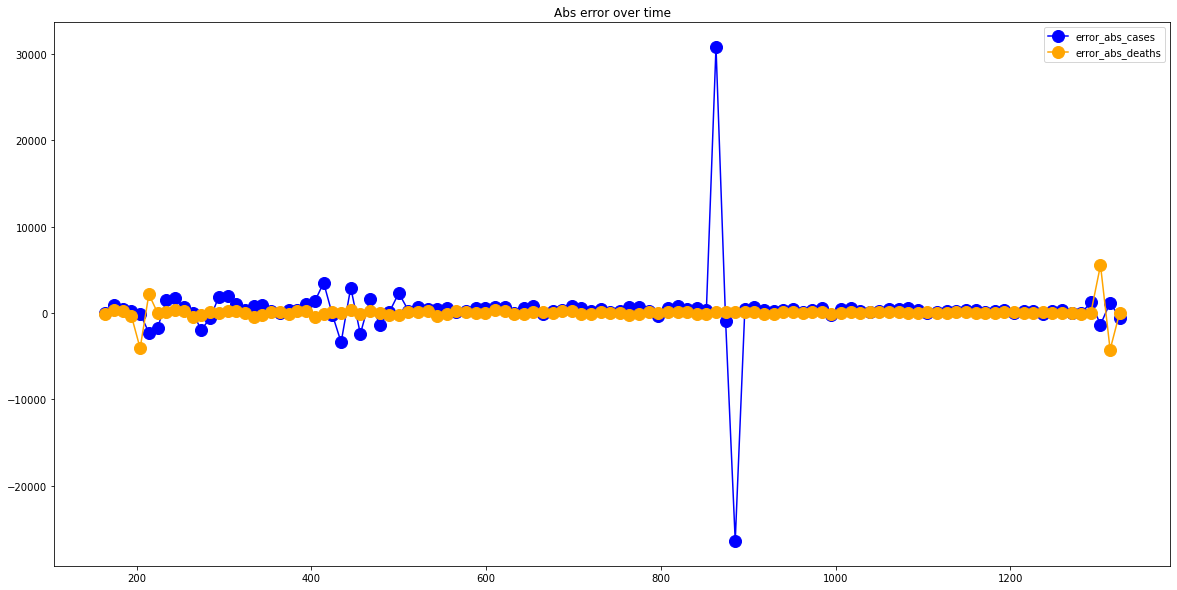

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  326.10091743119267
RMSE =  447.6715805550954
-- Germany performances for deaths --
MAE =  23.091743119266056
RMSE =  42.0060065604428


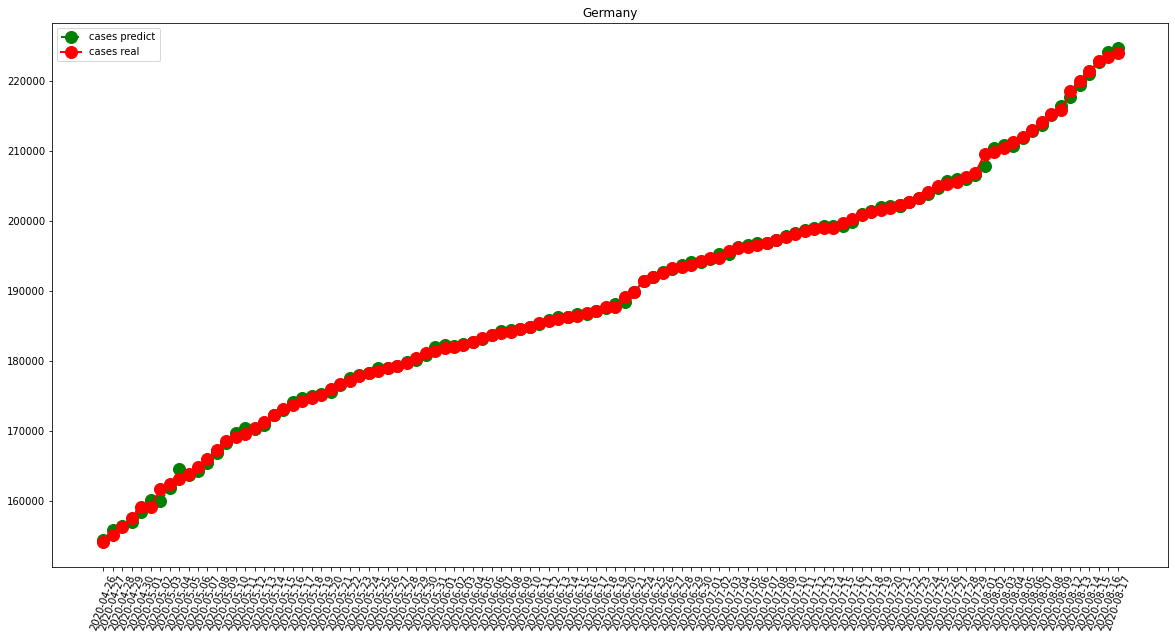

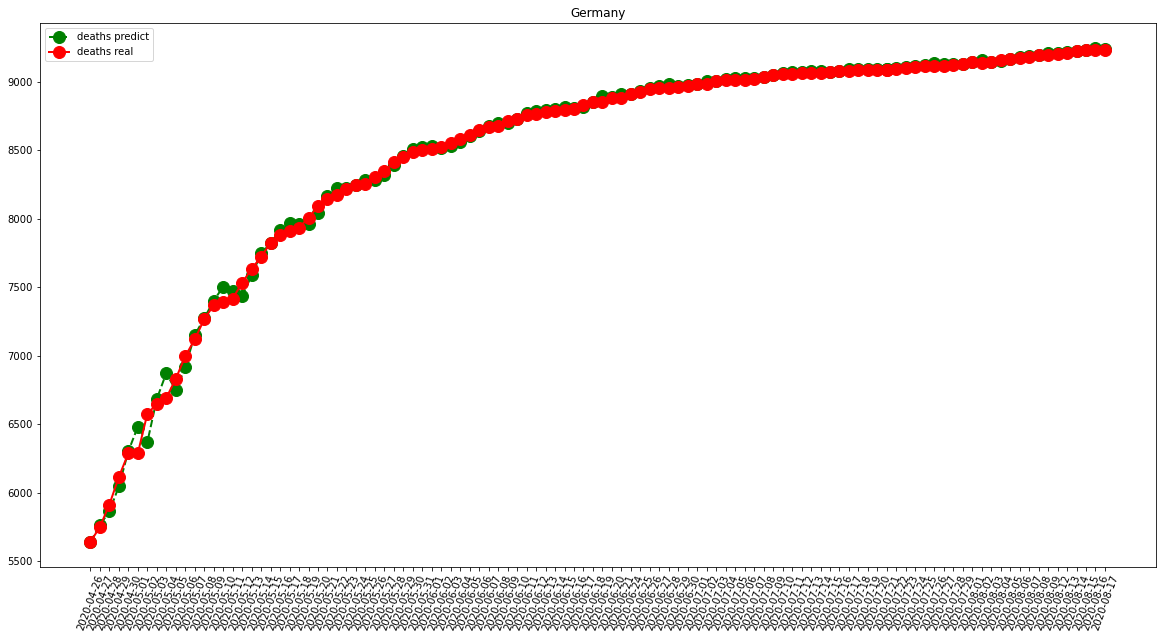

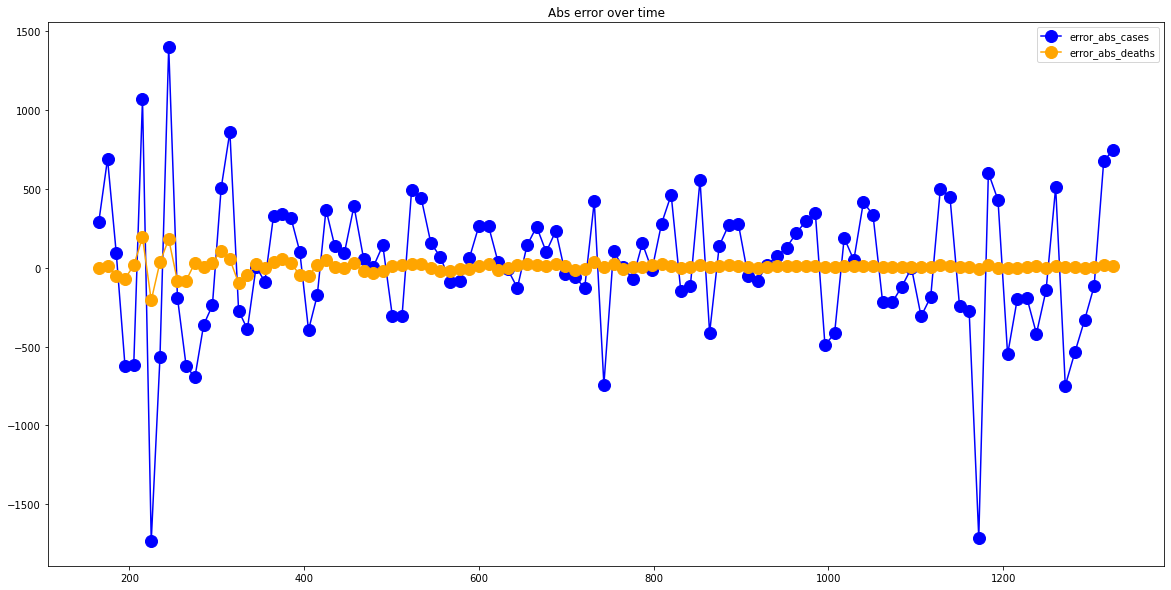

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  635.6880733944954
RMSE =  930.8931491024475
-- Iran performances for deaths --
MAE =  33.61467889908257
RMSE =  70.18912851338082


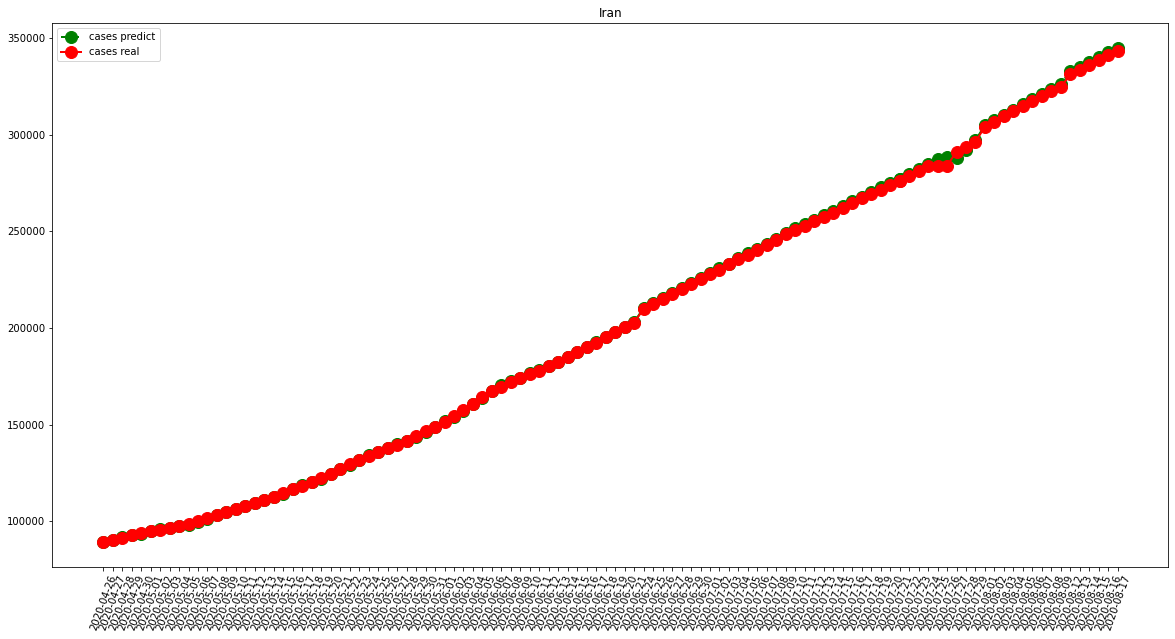

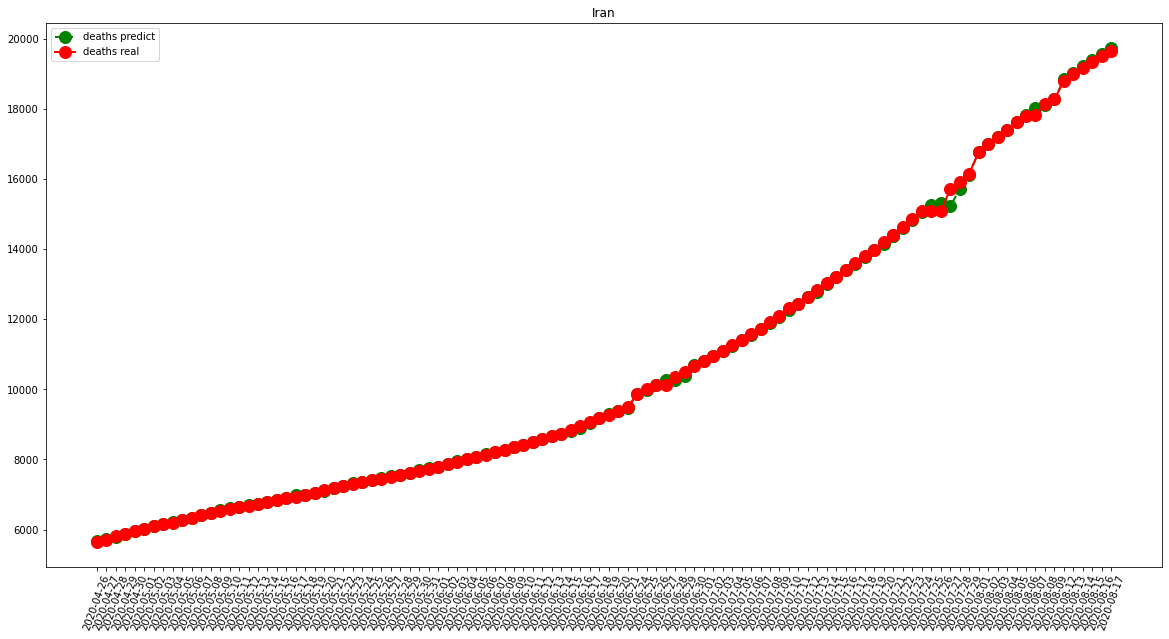

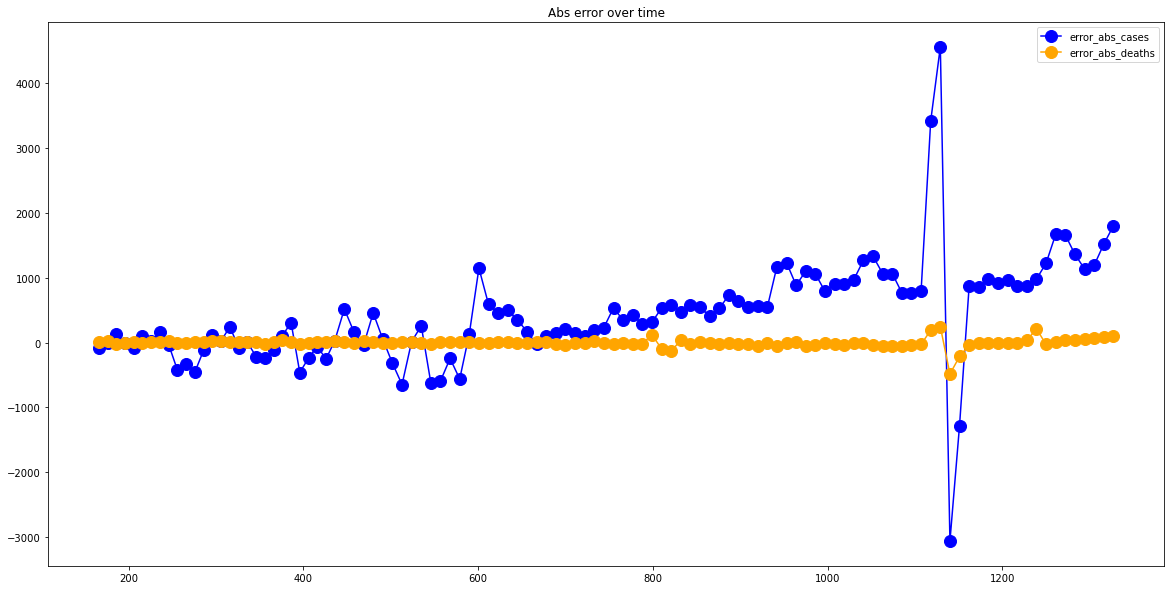

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.9908256880734
RMSE =  333.89134638780405
-- Turkey performances for deaths --
MAE =  17.6697247706422
RMSE =  97.2361166713331


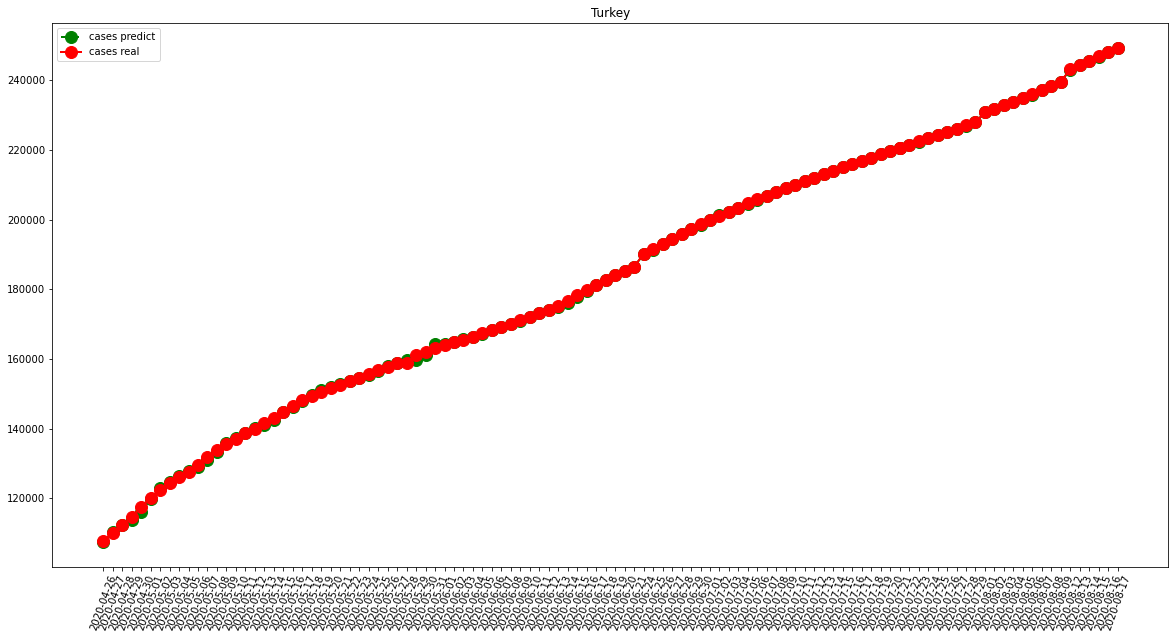

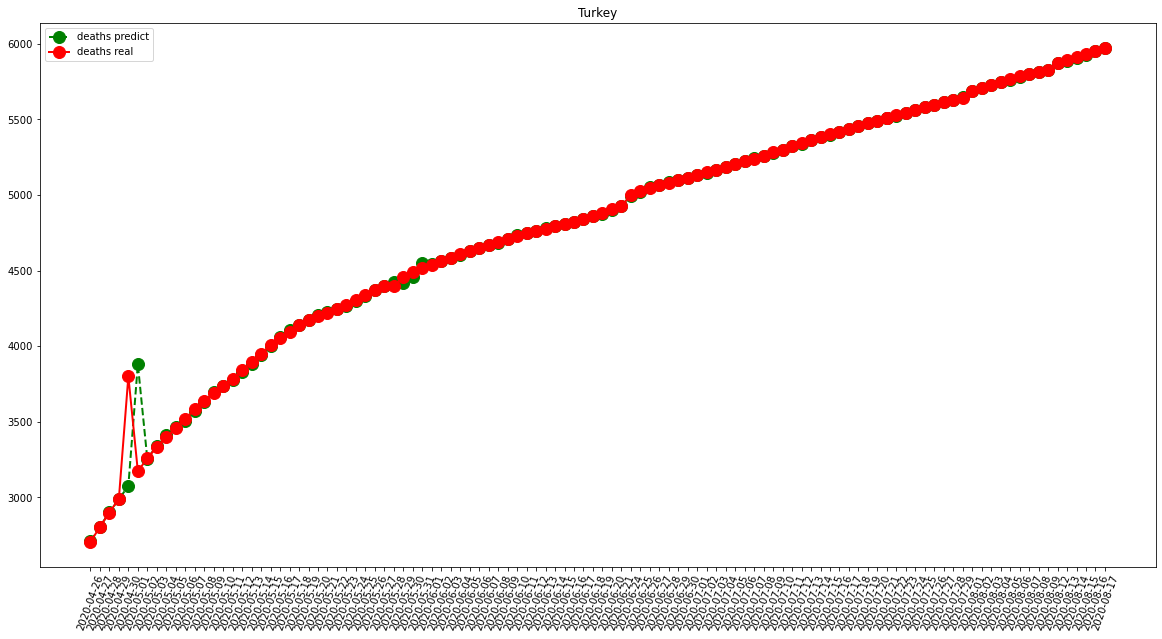

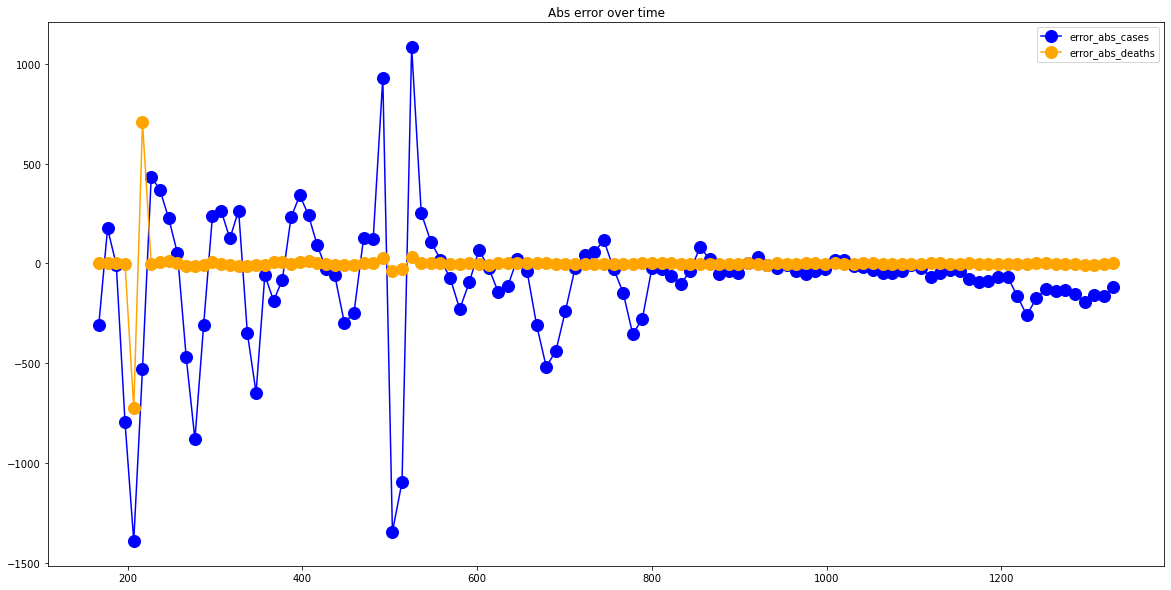

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12132.317073170732
RMSE =  16232.596929424777
-- Brazil performances for deaths --
MAE =  406.0975609756098
RMSE =  498.98782916874495


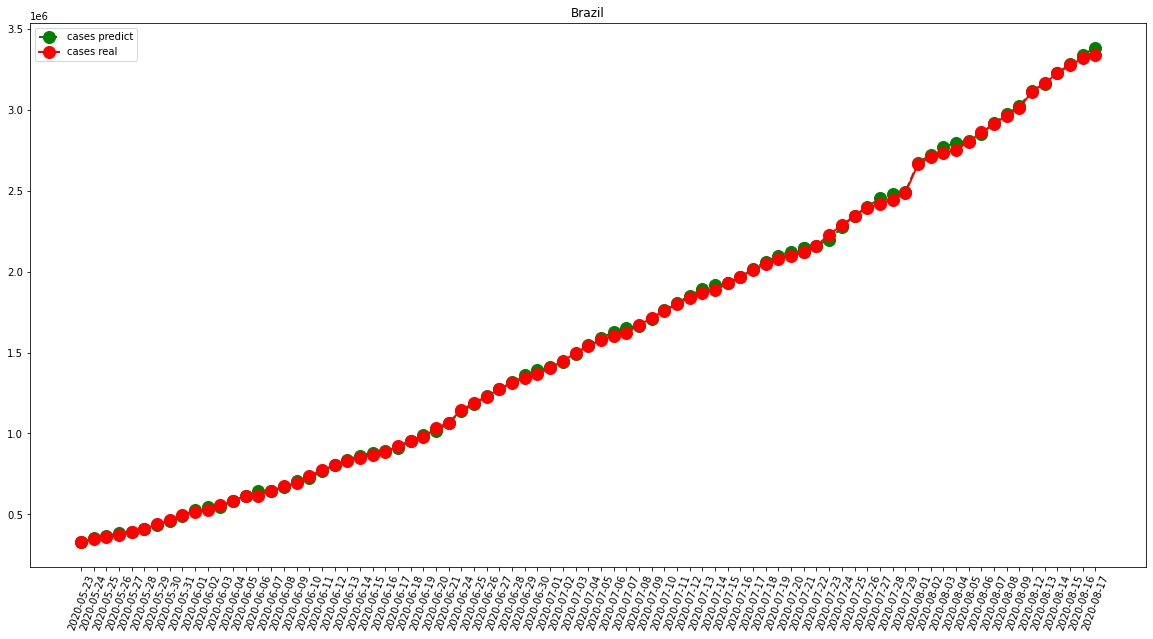

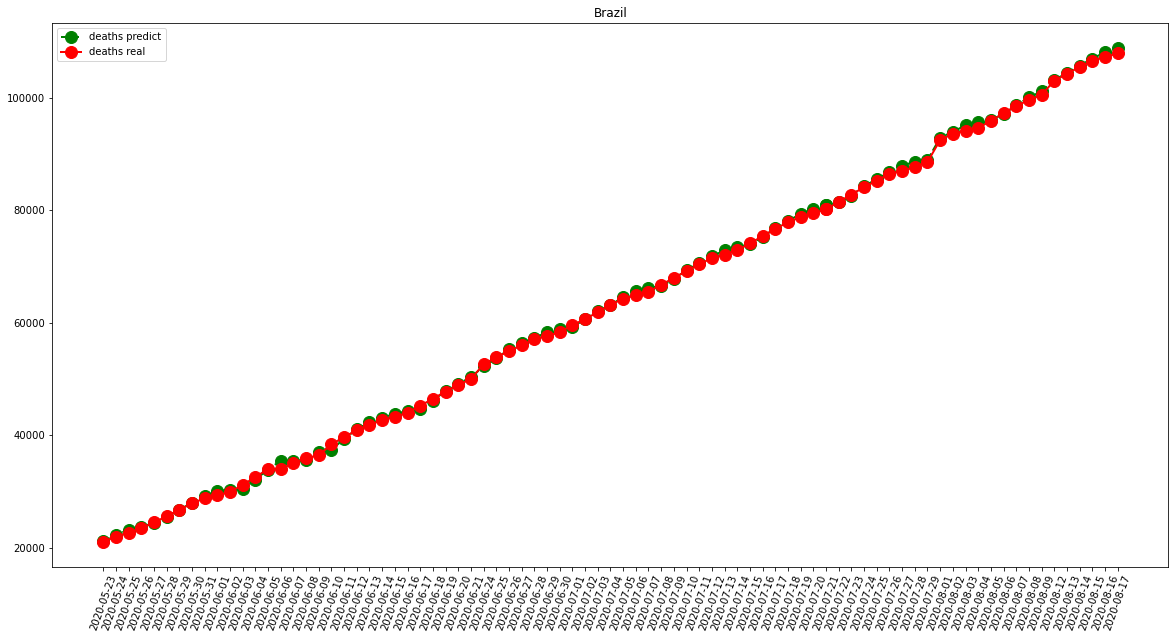

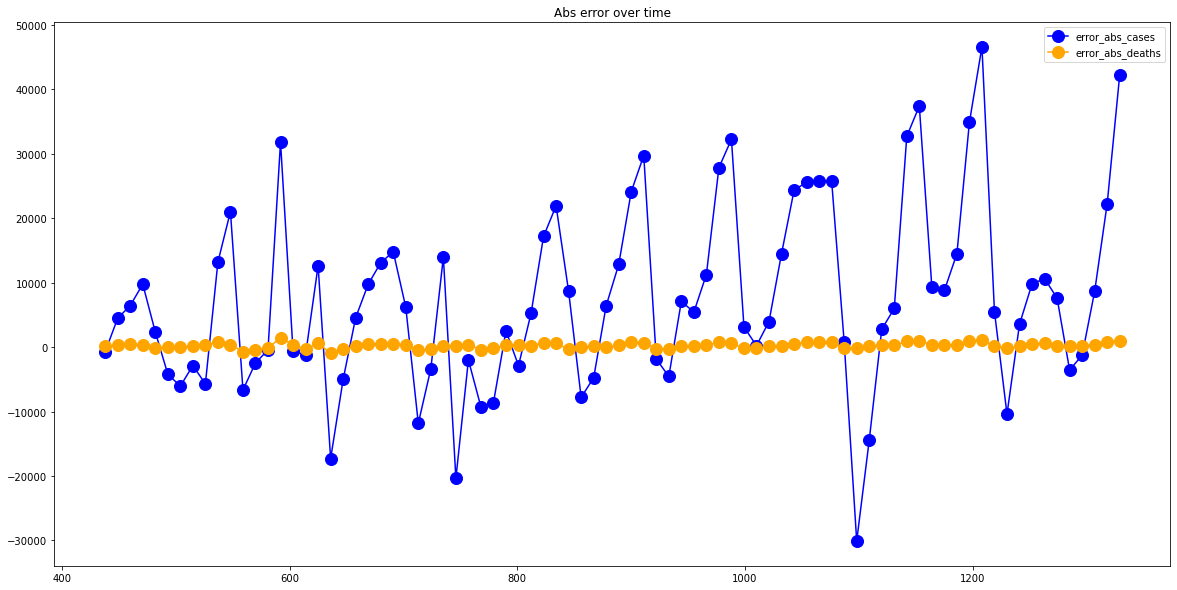

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)